# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 05.1

The wave functions $\Psi_{nlm}(\vec{x})$ of the eigenstates of the hydrogen atom can be calculated analytically. The eigenstates are specified by three quantum numbers $n$, $l$ and $m$. \
Here, we focus on the ground state $\Psi_{100}(\vec{x})$ and the excited state $\Psi_{210}(\vec{x})$. For these eigenstates, it can be shown that the expectation value of the radius operator $\hat{r} = |\hat{\vec{x}}| = \sqrt{\hat x ^2 + \hat y ^2 + \hat z ^2}$ are given by:
$$\left\langle \hat{r} \right\rangle_{100} = \frac{3}{2}
\quad
\left\langle \hat{r} \right\rangle_{210} = 5.$$

These values are expressed in units of the Bohr radius $a_0=0.0529\,\mathrm{nm}$. We will use this way of expressing lengths throughout the following discussion.

The scope of this exercise is to sample the probability density functions $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ using the **Metropolis algorithm**. To apply the Metropolis algorithm, we have to choose a **trial transition probability** $T(\vec{x}'|\vec{x_n})$, that describes a probability to transit from a given position $\vec{x_n}$ to any other position $\vec{x}'$ in the three dimensional space. We also have to choose a starting point $\vec{x_0}$ that can be used as $\vec{x_n}$ for $n=0$. Once we have calculated the trial transition probability for a certain step $n$, we have to caulcate the so-called **acceptance probability**: 
$$ A(\vec{x}'|\vec{x_n}) = \min \left \{1, \frac{p(\vec{x}')}{p(\vec{x_n})} \right \},$$

where $p$ is the probability density function that we desire to sample, so either $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$ in our case. It tells us the probability with which we should accept the step $\vec{x_{n+1}} = \vec{x}'$ proposed by a draw from the trial transition probability or if we should leave $\vec{x_{n+1}} = \vec{x_n}$. \
In the lecture notes, it has been shown that in doing so the set of positions $\{ \vec{x_0}, \vec{x_1}, ..., \vec{x_{M_{max}}} \}$ follows the probability density $p$.

In this exercise, we will use a uniform and a Gaussian trial transition probability to sample positions from $|\Psi_{100}(\vec{x})|^2$ and $|\Psi_{210}(\vec{x})|^2$. We will use them to estimate $\left\langle \hat{r} \right\rangle$ from the simulation.

### Normal Trial Transition Probability

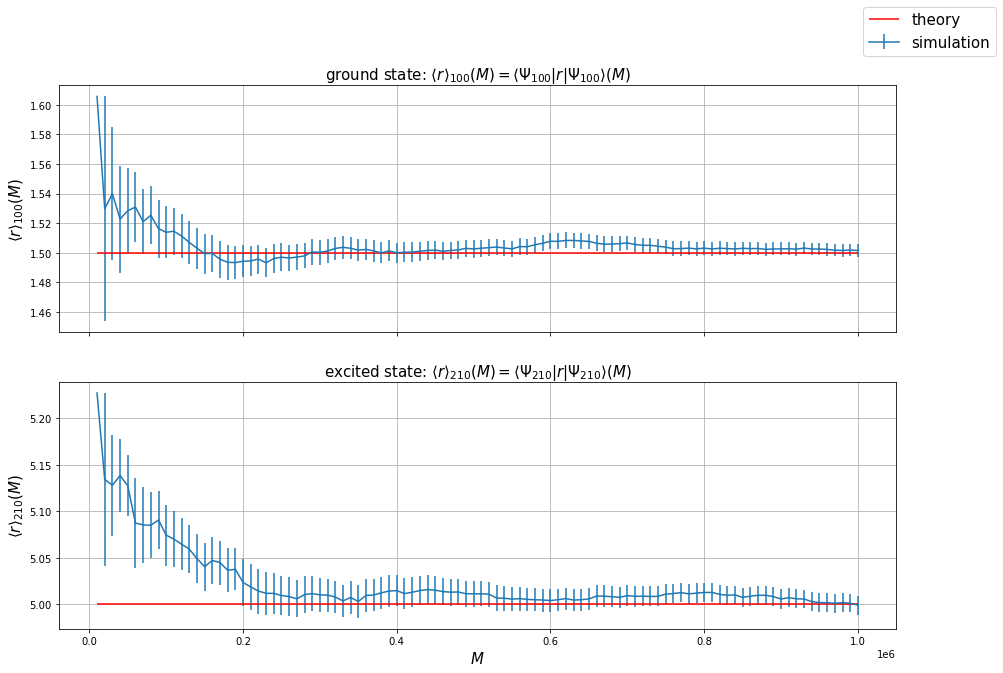

In [94]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle r \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle r \rangle_{100} (M) = \langle \Psi_{100} |r| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()

# plot for uni_100
M, r_mean, r_error  = np.loadtxt("data/uni_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error)
ax[1].hlines(5, min(M), max(M), color='r')
ax[1].set_ylabel(r"$\langle r \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle r \rangle_{210} (M) = \langle \Psi_{210} |r| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()

fig.legend(fontsize=15)
plt.xlabel(r"$M$", size=15)

plt.show()

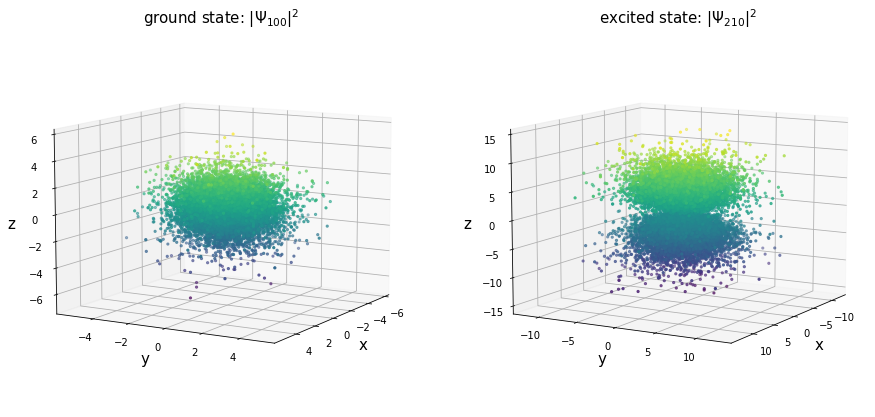

In [81]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))

# plot uni_110
x, y, z = np.loadtxt("data/uni_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot uni_210
x, y, z = np.loadtxt("data/uni_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()

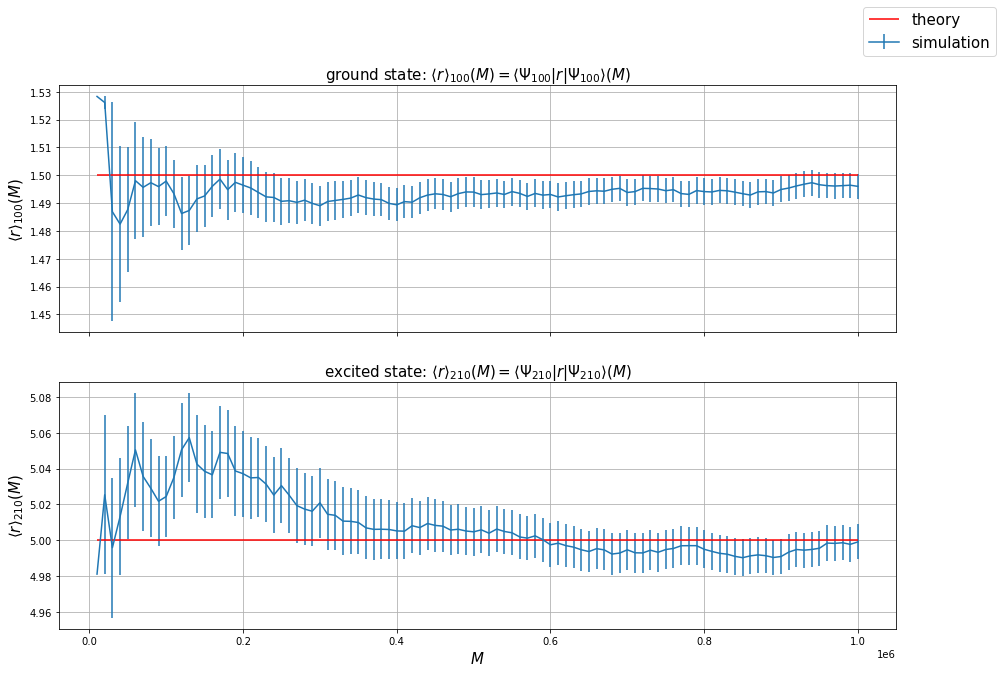

In [93]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_100.txt", skiprows=1, unpack=True, delimiter=',')
ax[0].errorbar(M, r_mean, r_error, label="simulation")
ax[0].hlines(1.5, min(M), max(M), color='r', label="theory")
ax[0].set_ylabel(r"$\langle r \rangle_{100} (M)$", size=15)
ax[0].set_title(r"ground state: $\langle r \rangle_{100} (M) = \langle \Psi_{100} |r| \Psi_{100} \rangle(M)$", size=15)
ax[0].grid()

# plot for gaussian_100
M, r_mean, r_error  = np.loadtxt("data/gaussian_210.txt", skiprows=1, unpack=True, delimiter=',')
ax[1].errorbar(M, r_mean, r_error)
ax[1].hlines(5, min(M), max(M), color='r')
ax[1].set_ylabel(r"$\langle r \rangle_{210} (M)$", size=15)
ax[1].set_title(r"excited state: $\langle r \rangle_{210} (M) = \langle \Psi_{210} |r| \Psi_{210} \rangle(M)$", size=15)
ax[1].grid()

fig.legend(fontsize=15)
plt.xlabel(r"$M$", size=15)

plt.show()

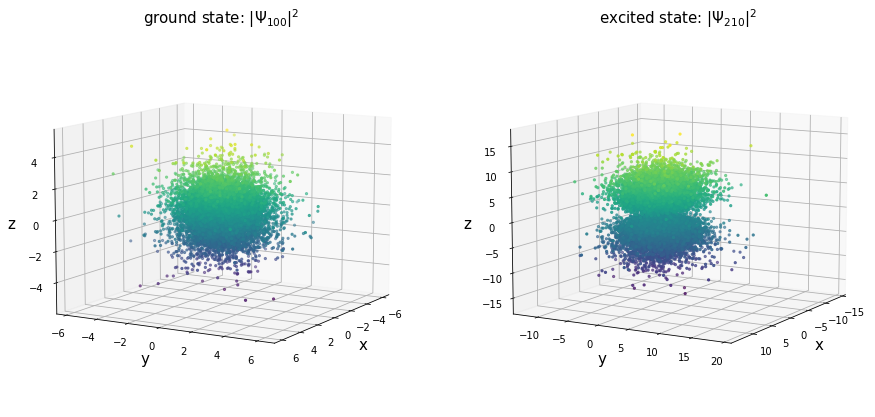

In [91]:
fig = plt.figure(figsize=(15,10))

# plot gaussian_110
x, y, z = np.loadtxt("data/gaussian_100.xyz", delimiter=',', unpack=True)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=z, marker='.')
ax1.set_xlabel('x', size=15)
ax1.set_ylabel('y', size=15)
ax1.set_zlabel('z', size=15)
ax1.view_init(10, 30)
ax1.set_title(r"ground state: $|\Psi_{100}|^2$", size=15)

# plot gaussian_210
x, y, z = np.loadtxt("data/gaussian_210.xyz", delimiter=',', unpack=True)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=z, marker='.')
ax2.set_xlabel('x', size=15)
ax2.set_ylabel('y', size=15)
ax2.set_zlabel('z', size=15)
ax2.view_init(10, 30)
ax2.set_title(r"excited state: $|\Psi_{210}|^2$", size=15)

plt.show()